<a href="https://colab.research.google.com/github/pramanand-coder/Machine-Learning/blob/main/taxiamount_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("/content/drive/MyDrive/Dataset/TaxiFare.csv")
data.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [3]:
data.drop(["unique_id"],inplace=True,axis=1)
data

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
49995,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [4]:
data.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
data.tail(5)

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
49995,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2
49999,10.9,2010-01-13 08:13:14 UTC,-73.932603,40.763805,-73.932603,40.763805,1


In [6]:
data.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [7]:
data.isnull().sum()

amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [8]:
data["year"]=pd.to_datetime(data["date_time_of_pickup"]).dt.year

In [9]:
data.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,2009
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,2010
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,2011
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2012
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,2010


In [10]:
data.columns

Index(['amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger', 'year'],
      dtype='object')

In [11]:
data['month'] = pd.to_datetime(data['date_time_of_pickup']).dt.month
data['day'] = pd.to_datetime(data['date_time_of_pickup']).dt.day

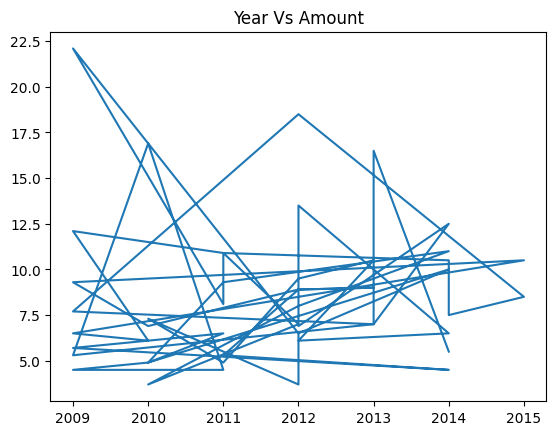

In [12]:
import matplotlib.pyplot as plt
plt.title("Year Vs Amount")
plt.plot(data["year"].sample(n=50,random_state=5),data["amount"].sample(n=50,random_state=5))

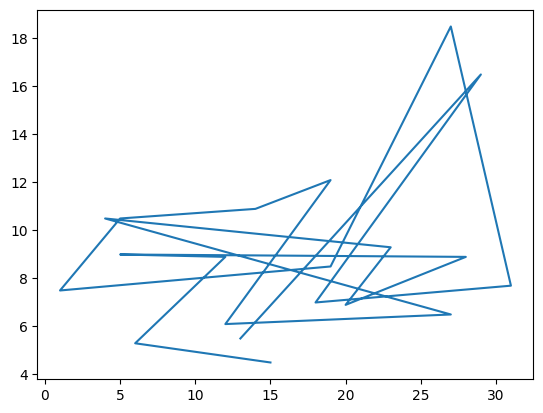

In [13]:
plt.plot(data["day"].sample(n=20,random_state=5),
data["amount"].sample(n=20,random_state=5))

In [14]:
from math import radians, sin, cos, sqrt, atan2

def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # Radius of the Earth in kilometers (change to 3959.0 for miles)
    radius = 6371.0

    distance = radius * c

    return distance

# Assuming your DataFrame is named 'df'
data['distance_traveled'] = data.apply(lambda row: haversine_distance(row['latitude_of_pickup'], row['longitude_of_pickup'],
                                                                  row['latitude_of_dropoff'], row['longitude_of_dropoff']), axis=1)

# Display the updated DataFrame with the new 'distance_traveled' column
print(data[['longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff', 'distance_traveled']])


       longitude_of_pickup  latitude_of_pickup  longitude_of_dropoff  \
0               -73.844311           40.721319            -73.841610   
1               -74.016048           40.711303            -73.979268   
2               -73.982738           40.761270            -73.991242   
3               -73.987130           40.733143            -73.991567   
4               -73.968095           40.768008            -73.956655   
...                    ...                 ...                   ...   
49995           -73.999973           40.748531            -74.016899   
49996           -73.984756           40.768211            -73.987366   
49997           -74.002698           40.739428            -73.998108   
49998           -73.946062           40.777567            -73.953450   
49999           -73.932603           40.763805            -73.932603   

       latitude_of_dropoff  distance_traveled  
0                40.712278           1.030764  
1                40.782004           8.

In [15]:
data

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day,distance_traveled
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,1.030764
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,8.450134
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,1.389525
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,2.799270
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1.999157
...,...,...,...,...,...,...,...,...,...,...,...
49995,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1,2013,6,12,4.940374
49996,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1,2015,6,22,0.874706
49997,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1,2011,1,30,2.263286
49998,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2,2012,11,6,0.665245


In [16]:
data["rate of one passenger"]=data["amount"]/data["no_of_passenger"]

In [17]:
data

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day,distance_traveled,rate of one passenger
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,1.030764,4.50
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,8.450134,16.90
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,1.389525,2.85
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,2.799270,7.70
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1.999157,5.30
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1,2013,6,12,4.940374,15.00
49996,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1,2015,6,22,0.874706,7.50
49997,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1,2011,1,30,2.263286,6.90
49998,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2,2012,11,6,0.665245,2.25


In [18]:
data=data.drop(["date_time_of_pickup"],axis=1)

In [19]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
data.dropna(inplace=True)

[]

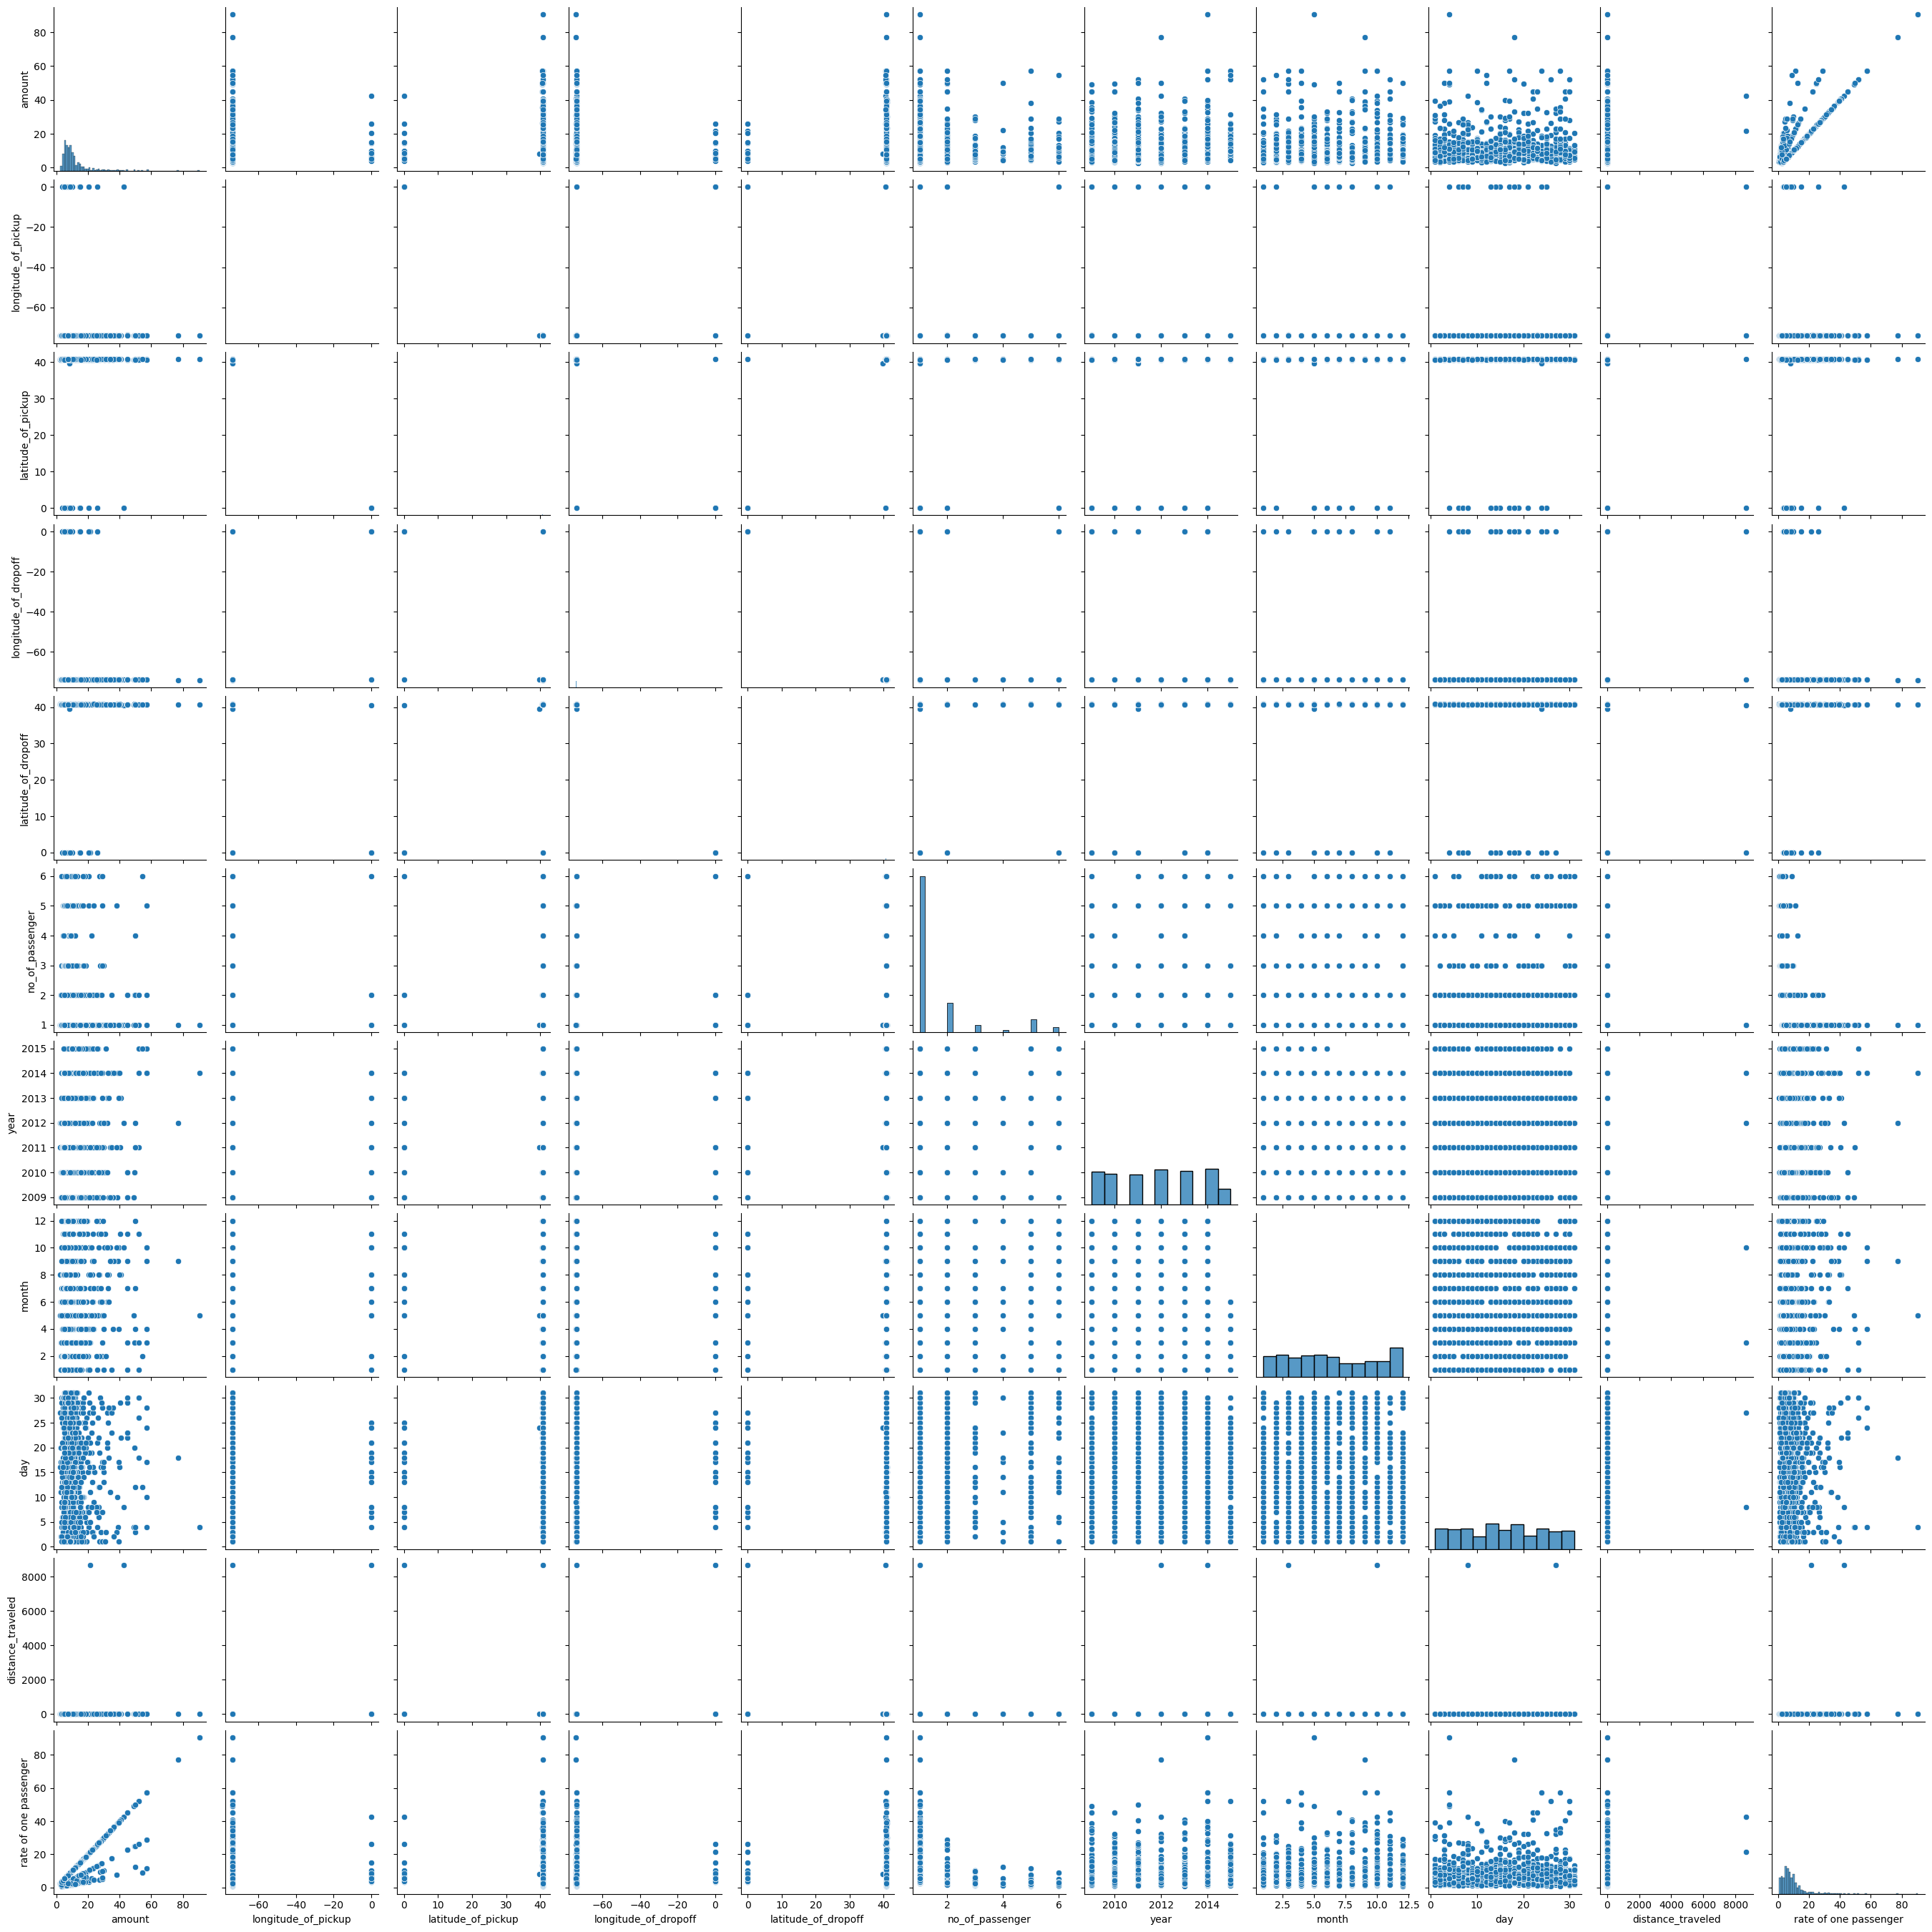

In [20]:
import seaborn as sns
a=data.sample(n=1000,random_state=6)
sns.pairplot(a)
plt.plot()

In [21]:
correlation_matrix=data.corr()
correlation_matrix

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day,distance_traveled,rate of one passenger
amount,1.000000,0.005987,-0.007379,0.004575,-0.005720,0.015776,0.120760,0.026800,-0.001570,0.016712,0.860980
longitude_of_pickup,0.005987,1.000000,-0.950419,0.957990,-0.948708,-0.005495,-0.001295,0.000080,0.005949,0.139770,0.007125
latitude_of_pickup,-0.007379,-0.950419,1.000000,-0.912678,0.929721,0.003132,-0.001328,0.001026,-0.006610,-0.122623,-0.007017
longitude_of_dropoff,0.004575,0.957990,-0.912678,1.000000,-0.982054,-0.004823,-0.000336,0.001404,0.005095,0.142689,0.006756
latitude_of_dropoff,-0.005720,-0.948708,0.929721,-0.982054,1.000000,0.002854,-0.001811,-0.000412,-0.007899,-0.124134,-0.006293
no_of_passenger,0.015776,-0.005495,0.003132,-0.004823,0.002854,1.000000,0.005608,0.008350,0.006836,-0.003333,-0.342789
year,0.120760,-0.001295,-0.001328,-0.000336,-0.001811,0.005608,1.000000,-0.115578,-0.011001,0.023374,0.109730
month,0.026800,0.000080,0.001026,0.001404,-0.000412,0.008350,-0.115578,1.000000,-0.017319,-0.010464,0.019069
day,-0.001570,0.005949,-0.006610,0.005095,-0.007899,0.006836,-0.011001,-0.017319,1.000000,0.010996,-0.002662
distance_traveled,0.016712,0.139770,-0.122623,0.142689,-0.124134,-0.003333,0.023374,-0.010464,0.010996,1.000000,0.018073


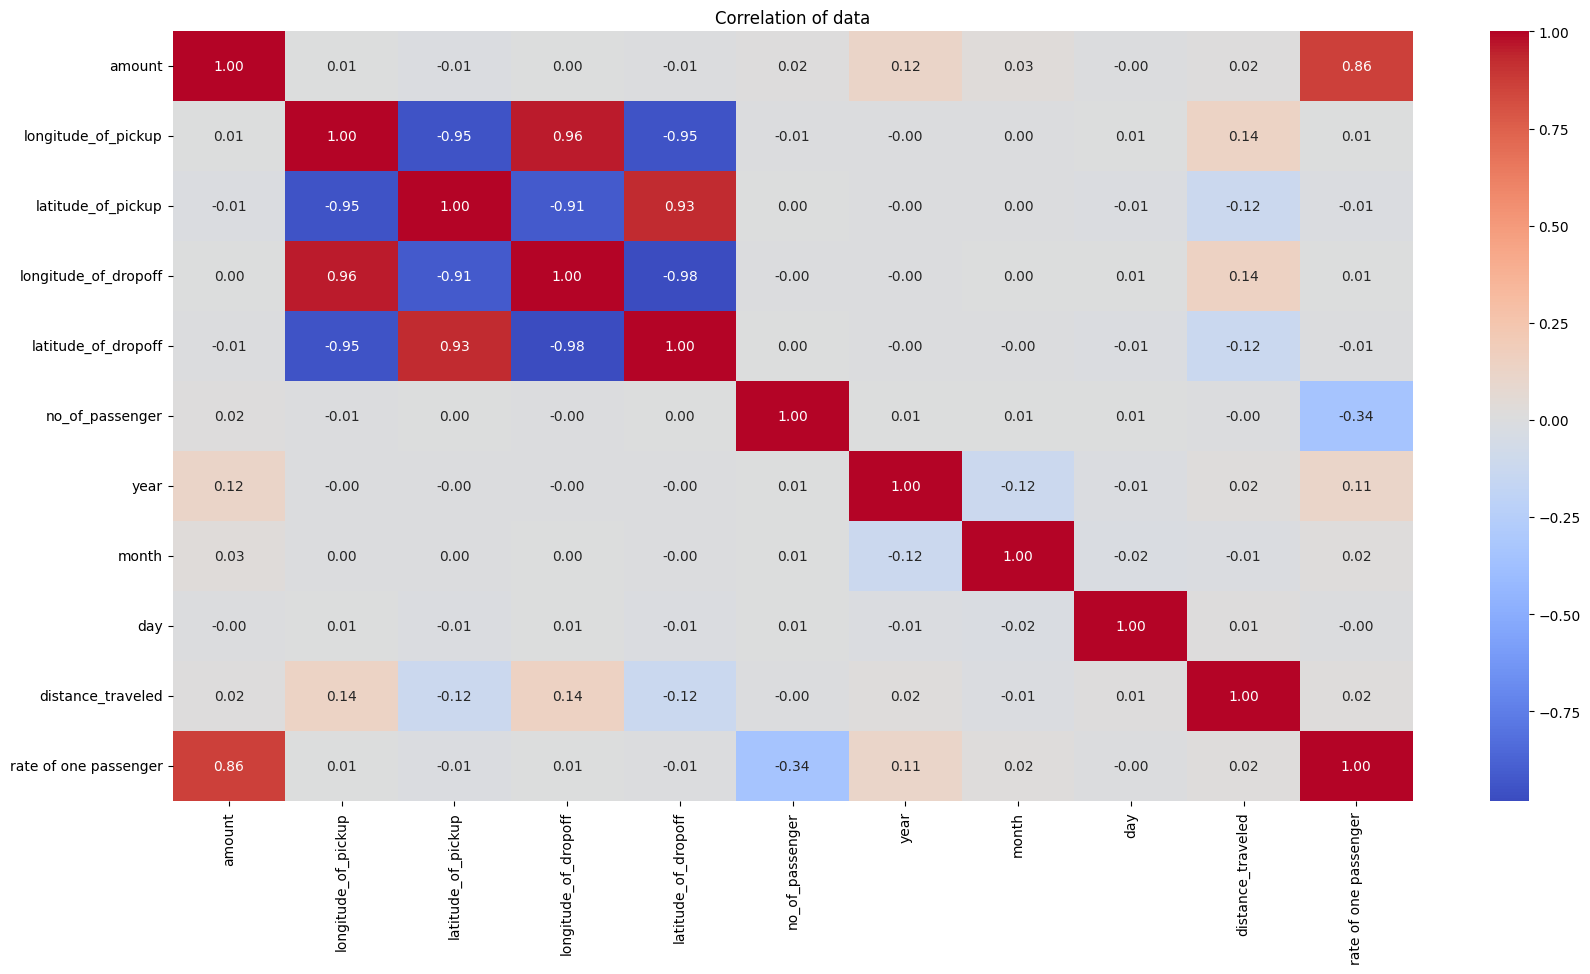

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation of data")
plt.show()

In [23]:
x=data.drop(["amount"],axis=1)
y=data["amount"]
print(x.shape)
print(y.shape)

(49835, 10)
(49835,)


In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=45)

In [25]:
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()
# Fit the scaler on the training data and transform both the training and testing data
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [30]:
algorithms=[LinearRegression,DecisionTreeRegressor,RandomForestRegressor,SVR,KNeighborsRegressor]
for alg in algorithms:
  model=alg()
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  score=r2_score(y_pred,y_test)
  mscore=mean_squared_error(y_test,y_pred)
  print("r2_score of ",alg,"=",score)
  print("mean squared error of ",alg,"=",score)

r2_score of  <class 'sklearn.linear_model._base.LinearRegression'> = 0.8403399646886436
mean squared error of  <class 'sklearn.linear_model._base.LinearRegression'> = 0.8403399646886436
r2_score of  <class 'sklearn.tree._classes.DecisionTreeRegressor'> = 0.9891119183986821
mean squared error of  <class 'sklearn.tree._classes.DecisionTreeRegressor'> = 0.9891119183986821
r2_score of  <class 'sklearn.ensemble._forest.RandomForestRegressor'> = 0.9956541127894015
mean squared error of  <class 'sklearn.ensemble._forest.RandomForestRegressor'> = 0.9956541127894015
r2_score of  <class 'sklearn.svm._classes.SVR'> = 0.9045439355736394
mean squared error of  <class 'sklearn.svm._classes.SVR'> = 0.9045439355736394
r2_score of  <class 'sklearn.neighbors._regression.KNeighborsRegressor'> = 0.9236333878202121
mean squared error of  <class 'sklearn.neighbors._regression.KNeighborsRegressor'> = 0.9236333878202121


In [32]:
model1=RandomForestRegressor()
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)

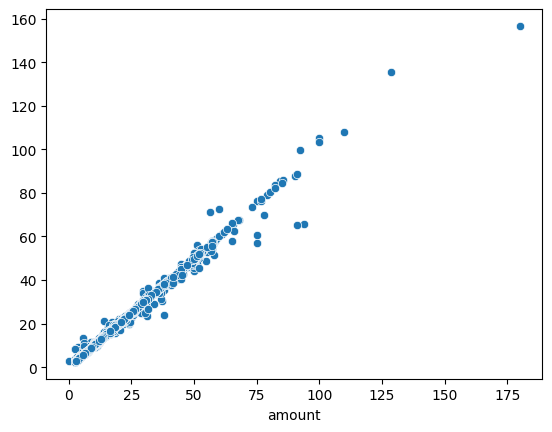

In [35]:
sns.scatterplot(x=y_test,y=y_pred1)
plt.show()